In [30]:
import pandas as pd
import random

# Set a random seed for reproducibility
random.seed(42)

# Number of rows for each class (AVP Yes and AVP No)
num_samples = 500000

# Generate data for AVP Yes
avp_yes_data = {
    'Employee_ID': [f'G0{random.randint(1000000, 9999999)}' for _ in range(num_samples)],
    'Apprenticeship_Type': [random.choice(['Foundation', 'Higher', 'Other']) for _ in range(num_samples)],
    'Graduate_Program': [random.choice(['Yes', 'No']) for _ in range(num_samples)],
    'Promotions': [random.randint(0, 5) for _ in range(num_samples)],
    'Age_Range': [random.choice(['20-25', '25-30', '30-35', '35-40']) for _ in range(num_samples)],
    'AVP': ['Yes'] * num_samples
}

# Generate data for AVP No
avp_no_data = {
    'Employee_ID': [f'G0{random.randint(1000000, 9999999)}' for _ in range(num_samples)],
    'Apprenticeship_Type': [random.choice(['Foundation', 'Higher', 'Other']) for _ in range(num_samples)],
    'Graduate_Program': [random.choice(['Yes', 'No']) for _ in range(num_samples)],
    'Promotions': [random.randint(0, 5) for _ in range(num_samples)],
    'Age_Range': [random.choice(['20-25', '25-30', '30-35', '35-40']) for _ in range(num_samples)],
    'AVP': ['No'] * num_samples
}

# Combine the data for AVP Yes and AVP No
sample_data = pd.concat([pd.DataFrame(avp_yes_data), pd.DataFrame(avp_no_data)], ignore_index=True)

# Shuffle the dataset to randomize the order
sample_data = sample_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the dataset to a CSV file (optional)
sample_data.to_csv('sample_avp_datsaset.csv', index=False)

# Display the first few rows of the dataset
print(sample_data.head())


  Employee_ID Apprenticeship_Type Graduate_Program  Promotions Age_Range  AVP
0   G04143752              Higher              Yes           4     20-25   No
1   G07939773               Other              Yes           0     35-40  Yes
2   G09143553          Foundation              Yes           3     25-30   No
3   G07972208          Foundation              Yes           2     30-35   No
4   G05036764              Higher              Yes           2     20-25  Yes


In [33]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load the sample dataset
sample_data = pd.read_csv('sample_avp_dataset.csv')

# Create a new column 'AVP_Binary' to store binary values (0 or 1)
sample_data['AVP_Binary'] = sample_data['AVP'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define the independent variables (features) and the dependent variable (target)
X = sample_data[['Apprenticeship_Type', 'Graduate_Program', 'Age_Range', 'Promotions']]
y = sample_data['AVP_Binary']

# Create dummy variables for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Add a constant to the independent variables (intercept) for both train and test sets
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit a logistic regression model to the training data
model = sm.Logit(y_train, X_train).fit()

# Evaluate the model on the test data
predictions = model.predict(X_test)

# Display the logistic regression summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.575584
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             AVP_Binary   No. Observations:                   50
Model:                          Logit   Df Residuals:                       42
Method:                           MLE   Df Model:                            7
Date:                Wed, 06 Sep 2023   Pseudo R-squ.:                  0.1448
Time:                        23:16:10   Log-Likelihood:                -28.779
converged:                       True   LL-Null:                       -33.651
Covariance Type:            nonrobust   LLR p-value:                    0.2036
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.6972      0.969      0.720      0.472      

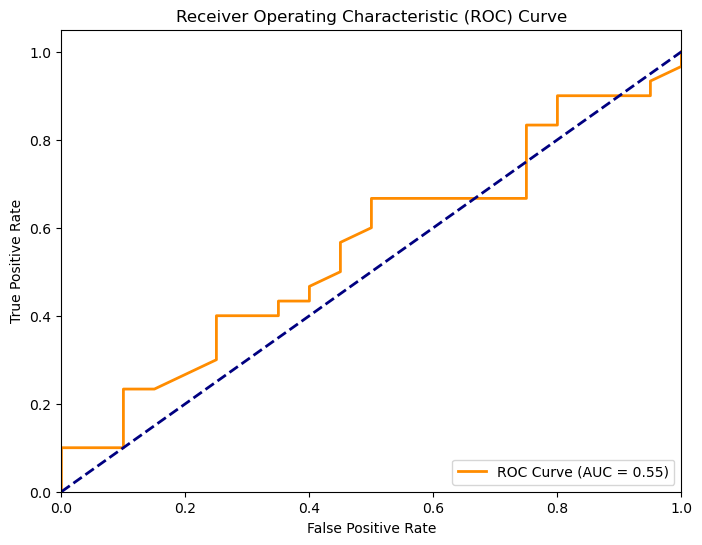

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, predictions)

# Create an ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Optimization terminated successfully.
         Current function value: 0.575584
         Iterations 6


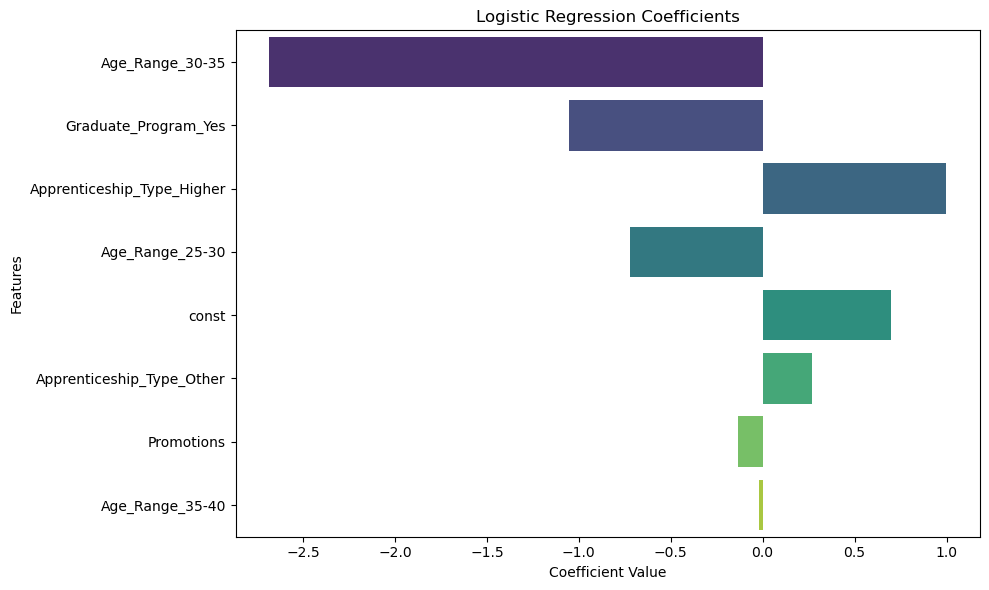

In [36]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
sample_data = pd.read_csv('sample_avp_dataset.csv')

# Create a new column 'AVP_Binary' to store binary values (0 or 1)
sample_data['AVP_Binary'] = sample_data['AVP'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define the independent variables (features) and the dependent variable (target)
X = sample_data[['Apprenticeship_Type', 'Graduate_Program', 'Age_Range', 'Promotions']]
y = sample_data['AVP_Binary']

# Create dummy variables for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Add a constant to the independent variables (intercept) for both train and test sets
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit a logistic regression model to the training data
model = sm.Logit(y_train, X_train).fit()

# Get the coefficients and feature names
coefficients = model.params
feature_names = X_train.columns

# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by magnitude (absolute value)
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Create a coefficient plot
plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients_df, y='Feature', x='Coefficient', palette='viridis')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [38]:
import pandas as pd

# Assuming your dataset is loaded into a DataFrame named sample_data
# Replace 'sample_data' with your actual DataFrame name if different

# Count the number of 'AVP Yes' (AVP_Binary = 1)
avp_yes_count = (sample_data['AVP_Binary'] == 1).sum()

# Count the number of 'AVP No' (AVP_Binary = 0)
avp_no_count = (sample_data['AVP_Binary'] == 0).sum()

# Print the counts
print(f'AVP Yes Count: {avp_yes_count}')
print(f'AVP No Count: {avp_no_count}')


AVP Yes Count: 50
AVP No Count: 50


In [39]:
import pandas as pd
from scipy.stats import skew

# Load your data
sample_data = pd.read_csv('sample_avp_dataset.csv')

# Select a specific numerical column to test for skewness, for example, 'Promotions'
column_to_test = sample_data['Promotions']

# Calculate the skewness of the selected column
skewness = skew(column_to_test)

# Interpret the skewness value
if skewness > 0:
    skewness_type = "positively skewed (right-skewed)"
elif skewness < 0:
    skewness_type = "negatively skewed (left-skewed)"
else:
    skewness_type = "approximately symmetric"

print(f"The skewness of the '{column_to_test.name}' column is {skewness:.2f}, indicating it is {skewness_type}.")



The skewness of the 'Promotions' column is -0.06, indicating it is negatively skewed (left-skewed).


In [44]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
data = pd.read_csv('sample_avp_dataset.csv')

# Calculate skewness for 'AVP Yes' and 'AVP No' variables
skewness_yes = data[data['AVP'] == 'Yes']['Promotions'].skew()
skewness_no = data[data['AVP'] == 'No']['Promotions'].skew()

print("Skewness for AVP Yes:", skewness_yes)
print("Skewness for AVP No:", skewness_no)


Skewness for AVP Yes: 0.03339971381970333
Skewness for AVP No: -0.15994509290099865


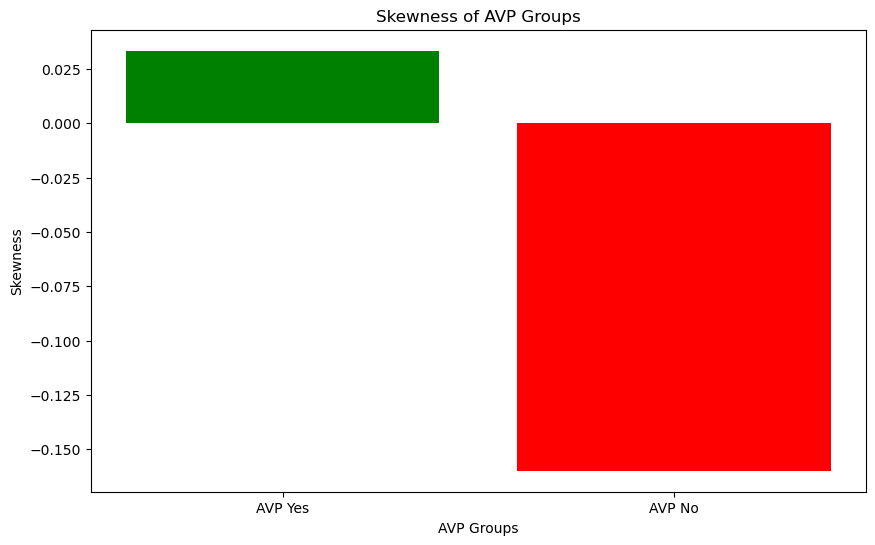

In [45]:
import matplotlib.pyplot as plt

# Skewness values
skewness_avp_yes = 0.0334
skewness_avp_no = -0.1599

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(['AVP Yes', 'AVP No'], [skewness_avp_yes, skewness_avp_no], color=['green', 'red'])
plt.title('Skewness of AVP Groups')
plt.xlabel('AVP Groups')
plt.ylabel('Skewness')
plt.show()


In [50]:
sample_data.head
sample_data.isnull().sum()
sample_data['AVP'].head()
# Convert 'Yes' to 1 and 'No' to 0 in the 'AVP' column
sample_data['AVP'] = sample_data['AVP'].map({'Yes': 1, 'No': 0})


In [52]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Replace 'AVP' with relevant column
time_series_avp = sample_data['AVP']

# Perform the ADF test for the 'AVP' column
result_avp = adfuller(time_series_avp)
p_value_avp = result_avp[1]

# Print the p-value and interpret the results
print("ADF Test p-value for AVP column:", p_value_avp)
if p_value_avp <= 0.05:
    print("Reject the null hypothesis. The AVP column is stationary.")
else:
    print("Fail to reject the null hypothesis. The AVP column may not be stationary.")

ADF Test p-value for AVP column: 2.4020355279319708e-18
Reject the null hypothesis. The AVP column is stationary.


In [53]:
import pandas as pd
from scipy.stats import normaltest #couldn't use on this column needs to be a numeric column for this test

your_data = pd.read_csv('sample_avp_dataset.csv')

# Assuming you want to perform the D'Agostino-Pearson test on the 'AVP' column
# Replace 'AVP' with the actual column name you want to test
data_column = your_data['AVP']

# Perform the D'Agostino-Pearson test
k2_statistic, p_value = normaltest(data_column)

# Print the results
print("D'Agostino-Pearson Test Statistic:", k2_statistic)
print("p-value:", p_value)

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis. The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis. The data may be normally distributed.")


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [56]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load dataset
your_data = pd.read_csv('sample_avp_dataset.csv')

# Filter the DataFrame to select rows where 'Apprenticeship_Type' is 'Higher'
subset_higher = your_data[your_data['Apprenticeship_Type'] == 'Higher']

# Create a contingency table between 'AVP' and 'Apprenticeship_Type' for the 'Higher' subset
contingency_table = pd.crosstab(subset_higher['AVP'], subset_higher['Apprenticeship_Type'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared statistic for 'Higher' subset:", chi2)
print("p-value for 'Higher' subset:", p)

# Interpret the result
if p < 0.05:
    print("Reject the null hypothesis. There's a relationship between 'AVP' and 'Apprenticeship_Type' for the 'Higher' subset.")
else:
    print("Fail to reject the null hypothesis. 'AVP' and 'Apprenticeship_Type' may be independent for the 'Higher' subset.")


Chi-squared statistic for 'Higher' subset: 0.0
p-value for 'Higher' subset: 1.0
Fail to reject the null hypothesis. 'AVP' and 'Apprenticeship_Type' may be independent for the 'Higher' subset.
